# Plots of explanatory variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/full_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],...,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
0,0,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,36.0,...,0.0,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2
1,1,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,36.0,...,0.0,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2
2,2,884.0,696.0,684.0,1.0,422.0,583.0,2773.0,208.0,40.0,...,0.0,95.0,0.0,0.0,4.3,3.6,29510.0,254.0,6.4,3.5
3,3,897.0,691.0,683.0,1.0,422.0,538.0,2774.0,208.0,40.0,...,0.0,96.0,0.0,0.0,4.2,3.5,26980.0,261.0,6.4,3.6
4,4,898.0,696.0,687.0,1.0,417.0,545.0,2774.0,208.0,38.0,...,0.0,96.0,0.0,0.0,4.2,3.6,19950.0,253.0,5.9,3.3


## Change time variables to timestamps

In [4]:
df['start_time'] = pd.to_datetime(df.start_time, format='%Y-%m-%d %H:%M:%S')

In [5]:
df['end_time'] = pd.to_datetime(df.end_time, format='%Y-%m-%d %H:%M:%S')

In [6]:
df['date'] = df['start_time'].dt.date

In [7]:
df

,Unnamed: 0,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],...,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed,date
0,0,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,36.0,...,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2,2015-01-02
1,1,881.0,700.0,686.0,1.0,428.0,622.0,2773.0,208.0,36.0,...,95.0,0.0,0.0,4.1,3.3,37770.0,249.0,6.0,3.2,2015-01-02
2,2,884.0,696.0,684.0,1.0,422.0,583.0,2773.0,208.0,40.0,...,95.0,0.0,0.0,4.3,3.6,29510.0,254.0,6.4,3.5,2015-01-02
3,3,897.0,691.0,683.0,1.0,422.0,538.0,2774.0,208.0,40.0,...,96.0,0.0,0.0,4.2,3.5,26980.0,261.0,6.4,3.6,2015-01-02
4,4,898.0,696.0,687.0,1.0,417.0,545.0,2774.0,208.0,38.0,...,96.0,0.0,0.0,4.2,3.6,19950.0,253.0,5.9,3.3,2015-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36035,37235,775.0,881.0,634.0,0.0,383.0,1779.0,2796.0,70.0,27.0,...,96.0,0.5,0.0,1.5,0.9,6020.0,235.0,3.3,2.4,2020-12-31
36036,37236,785.0,815.0,518.0,1.0,346.0,1525.0,2796.0,72.0,27.0,...,97.0,0.0,0.0,1.2,0.8,7380.0,261.0,3.7,2.7,2020-12-31
36037,37237,776.0,772.0,455.0,1.0,321.0,1412.0,2796.0,72.0,27.0,...,97.0,0.0,0.0,0.2,-0.1,2090.0,284.0,1.8,1.3,2020-12-31
36038,37238,770.0,734.0,397.0,1.0,307.0,1317.0,2796.0,72.0,27.0,...,98.0,0.0,0.0,0.2,-0.1,340.0,240.0,4.4,2.8,2020-12-31


In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
df.price_per_barrel_dollars = pd.to_numeric(df.price_per_barrel_dollars)

Text(0, 0.5, 'EUR/Mwh')

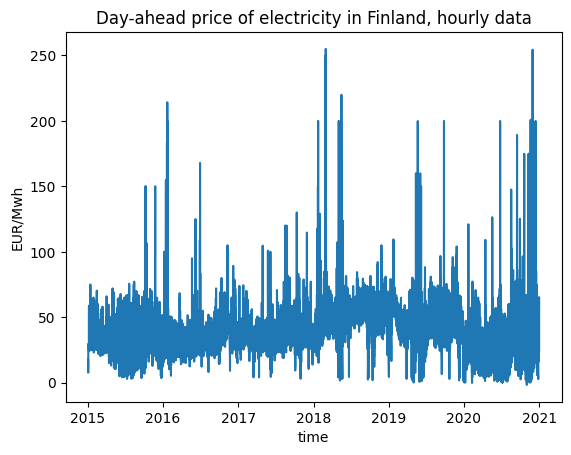

In [10]:
plt.plot(df.start_time, df['Day-ahead Price [EUR/MWh]'])
plt.title('Day-ahead price of electricity in Finland, hourly data')
plt.xlabel('time')
plt.ylabel('EUR/Mwh')

## Plot the variables

In [11]:
means = df.groupby('date', as_index=False).agg({'Day-ahead Price [EUR/MWh]':'mean', 'Actual Total Load [MW] - BZN|FI':'mean', 'Fossil Oil  - Actual Aggregated [MW]':'mean', 'generation_total': 'mean', 'price_per_barrel_dollars':'mean'})

In [12]:
means

,date,Day-ahead Price [EUR/MWh],Actual Total Load [MW] - BZN|FI,Fossil Oil - Actual Aggregated [MW],generation_total,price_per_barrel_dollars
0,2015-01-02,24.726667,9992.041667,1.000000,7160.083333,52.72
1,2015-01-05,41.246667,11877.708333,1.208333,8694.208333,50.05
2,2015-01-06,32.452500,12044.250000,0.458333,8632.041667,47.98
3,2015-01-07,32.923750,11746.125000,1.250000,8568.583333,48.69
4,2015-01-08,29.895833,11075.041667,2.916667,7746.541667,48.80
...,...,...,...,...,...,...
1498,2020-12-24,18.235000,9053.625000,1.000000,7018.625000,48.18
1499,2020-12-28,26.395417,10072.916667,0.375000,8146.416667,47.50
1500,2020-12-29,33.690000,10197.875000,0.041667,7868.458333,47.85
1501,2020-12-30,34.521250,10191.458333,0.666667,7772.875000,48.24


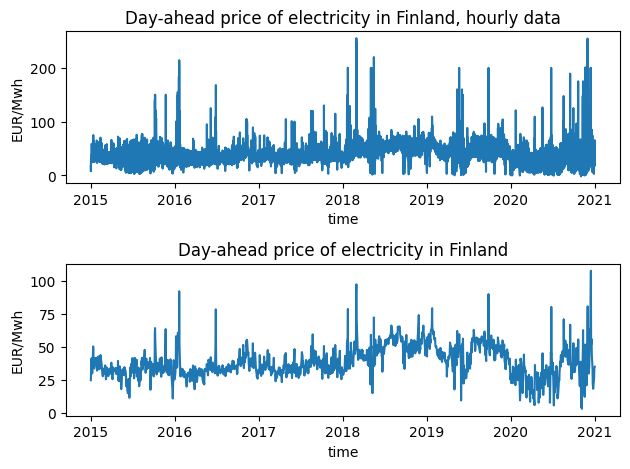

In [13]:
fig, ax = plt.subplots(2)

ax[0].plot(df.start_time, df['Day-ahead Price [EUR/MWh]'])
ax[0].set_title('Day-ahead price of electricity in Finland, hourly data')
ax[0].set(xlabel = 'time', ylabel = 'EUR/Mwh')
#plt.ylabel('EUR/Mwh')


ax[1].plot(means.date, means['Day-ahead Price [EUR/MWh]'])
ax[1].set_title('Day-ahead price of electricity in Finland')
ax[1].set(xlabel = 'time', ylabel = 'EUR/Mwh')

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2  

plt.tight_layout()

plt.savefig('./images/prices.png')

#plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

The prices seem to change a lot. Additionally, there is no data available for year 2016. This is probably just an accident and I will fix it.

### Same for generation

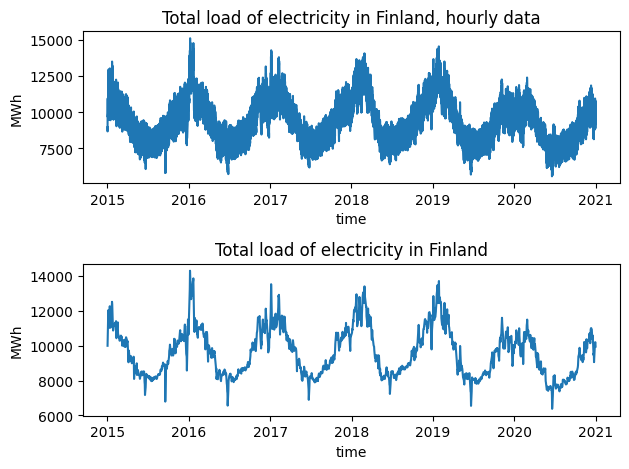

In [14]:
fig, ax = plt.subplots(2)

ax[0].plot(df.start_time, df['Actual Total Load [MW] - BZN|FI'])
ax[0].set_title('Total load of electricity in Finland, hourly data')
ax[0].set(xlabel = 'time', ylabel = 'MWh')
#plt.ylabel('EUR/Mwh')


ax[1].plot(means.date, means['Actual Total Load [MW] - BZN|FI'])
ax[1].set_title('Total load of electricity in Finland')
ax[1].set(xlabel = 'time', ylabel = 'MWh')

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2  

plt.tight_layout()

#plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

Text(0, 0.5, 'MW')

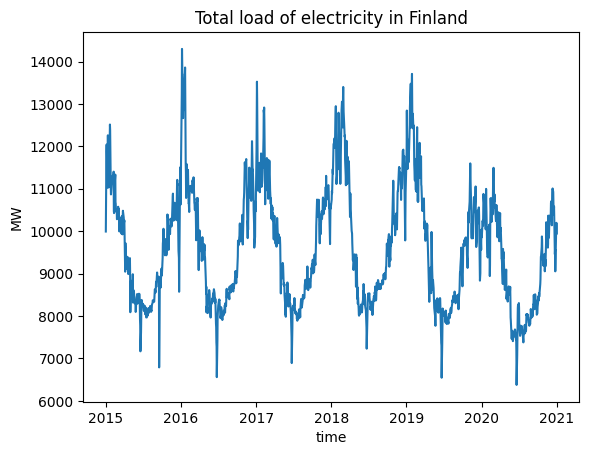

In [15]:
plt.plot(means.date, means['Actual Total Load [MW] - BZN|FI'])
plt.title('Total load of electricity in Finland')
plt.xlabel('time')
plt.ylabel('MW')

Text(0, 0.5, 'MW')

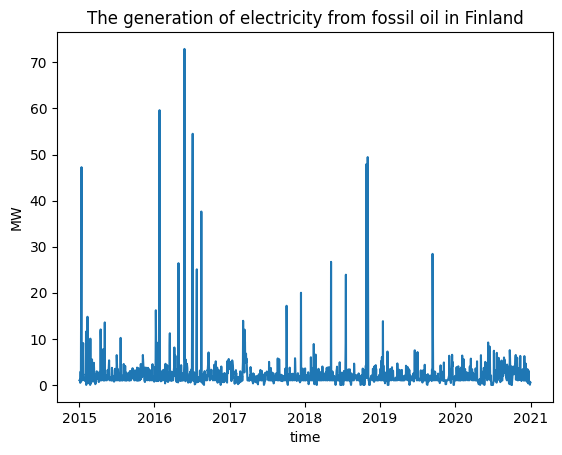

In [16]:
plt.plot(means.date, means['Fossil Oil  - Actual Aggregated [MW]'])
plt.title('The generation of electricity from fossil oil in Finland')
plt.xlabel('time')
plt.ylabel('MW')

The first months of 2022 seem interesting.

In [17]:
df.loc[(df['start_time'] > pd.Timestamp('2022-04-01')) & (df['start_time'] < pd.Timestamp('2022-04-30'))]

,Biomass - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Waste - Actual Aggregated [MW],...,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed,date


It seems like until some point in April 2022 the value has always been set to 10. The values of fossil fuel seem somewhat weird overall as they are very stable.

Text(0, 0.5, 'MW')

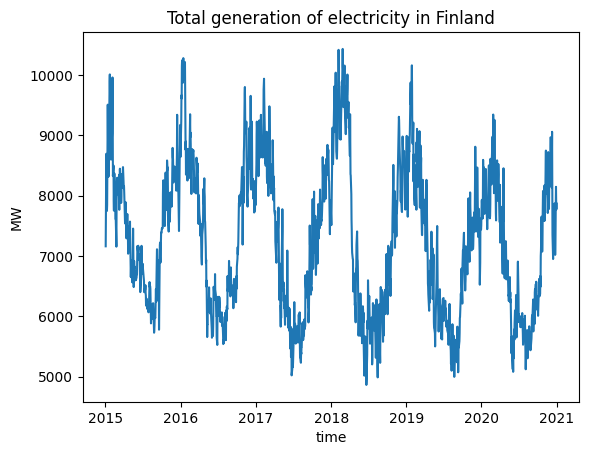

In [18]:
plt.plot(means.date, means['generation_total'])
plt.title('Total generation of electricity in Finland')
plt.xlabel('time')
plt.ylabel('MW')

In [19]:
arr = ['Actual Total Load [MW] - BZN|FI', 'generation_total']

In [20]:
arr

['Actual Total Load [MW] - BZN|FI', 'generation_total']

In [21]:
means[arr]

,Actual Total Load [MW] - BZN|FI,generation_total
0,9992.041667,7160.083333
1,11877.708333,8694.208333
2,12044.250000,8632.041667
3,11746.125000,8568.583333
4,11075.041667,7746.541667
...,...,...
1498,9053.625000,7018.625000
1499,10072.916667,8146.416667
1500,10197.875000,7868.458333
1501,10191.458333,7772.875000


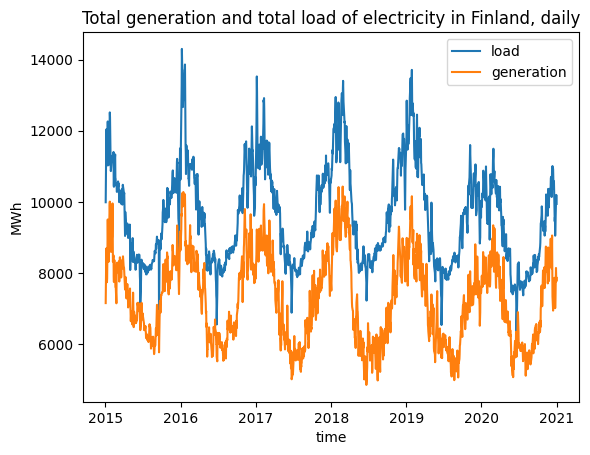

In [22]:
arr = ['Actual Total Load [MW] - BZN|FI', 'generation_total']

for column in means[arr]:
    y = means[column]
    label = column
    lines = plt.plot(means.date, y, label = label)

plt.legend(['load', 'generation'])
plt.title('Total generation and total load of electricity in Finland, daily')
plt.xlabel('time')
plt.ylabel('MWh')

plt.savefig('./images/load_and_gen_daily.png')

Text(0, 0.5, 'EUR/Mwh')

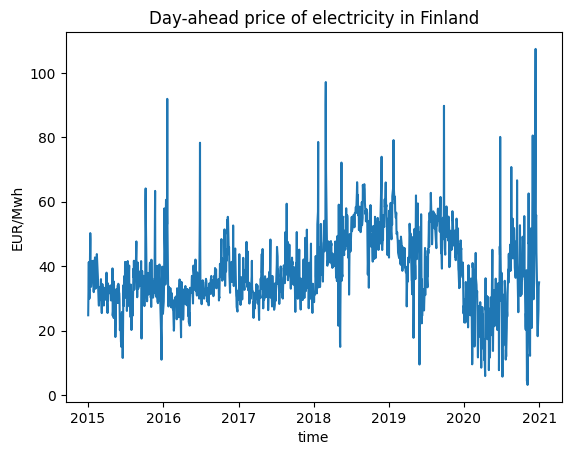

In [23]:
plt.plot(means.date, means['Day-ahead Price [EUR/MWh]'])
plt.title('Day-ahead price of electricity in Finland')
plt.xlabel('time')
plt.ylabel('EUR/Mwh')

In [ ]:

ax[0].plot(df.start_time, df['Actual Total Load [MW] - BZN|FI'])
ax[0].set_title('Total load of electricity in Finland, hourly data')
ax[0].set(xlabel = 'time', ylabel = 'MWh')
#plt.ylabel('EUR/Mwh')


ax[1].plot(means.date, means['Actual Total Load [MW] - BZN|FI'])
ax[1].set_title('Total load of electricity in Finland')
ax[1].set(xlabel = 'time', ylabel = 'MWh')

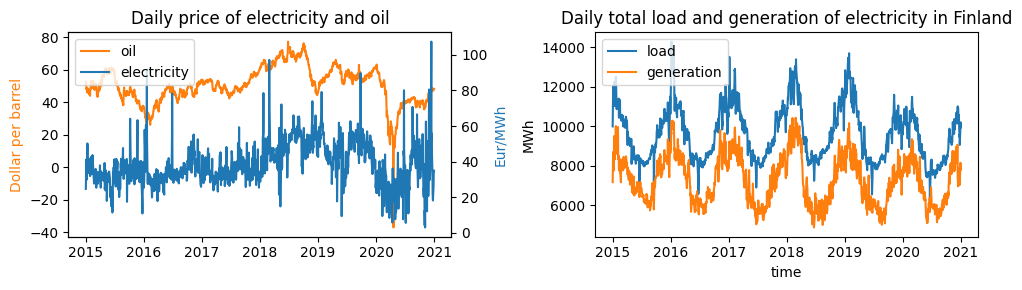

In [57]:
arr = ['Day-ahead Price [EUR/MWh]', 'price_per_barrel']
#fig,axs = plt.subplots(1,2)

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)

#ax = axs[0]
#ax1 = axs[1]

oil = ax.plot(means['date'],
       means['price_per_barrel_dollars'],
       color = '#ff7f0e')

ax.set_ylabel("Dollar per barrel",
             color = '#ff7f0e')
#ax.legend(loc = 0)

ax2 = ax.twinx()
elec = ax2.plot(means['date'],
        means['Day-ahead Price [EUR/MWh]'],
               color = '#1f77b4')
ax2.set_ylabel('Eur/MWh',
              color = '#1f77b4')

lines = oil + elec
#labels = [l.get_label() for l in lines]

#ax3 = ax.twinx()
#ax3.set_title('Day-ahead price of electricity in Finland, hourly data')
#ax3.set(xlabel = 'time', ylabel = 'EUR/Mwh')
#plt.ylabel('EUR/Mwh')


plt.legend(lines, ['oil', 'electricity'], loc = 0)

#for column in means[arr]:
#    y = means[column]
#    label = column
#    lines = plt.plot(means.date, y, label = label)

#plt.legend(['price of oil', 'price of electricity'])
ax2.set_title('Daily price of electricity and oil')
ax2.set(xlabel = 'time')
#plt.ylabel('EUR/Mwh')

arr = ['Actual Total Load [MW] - BZN|FI', 'generation_total']

for column in means[arr]:
    y = means[column]
    label = column
    lines = ax1.plot(means.date, y, label = label)

ax1.legend(['load', 'generation'])
#plt.title('Total generation and total load of electricity in Finland, daily')
ax1.set_xlabel('time')
ax1.set_ylabel('MWh')
ax1.set_title('Daily total load and generation of electricity in Finland')


plt.tight_layout()

#lt.savefig('./images/load_and_gen_daily.png')


plt.savefig('./images/elec_and_oil_load_and_gen.png')

## Weather data

## Correlation matrix

In [25]:
df.columns

Index(['Biomass  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Nuclear  - Actual Aggregated [MW]', 'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Waste  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]',
       'Day-ahead Total Load Forecast [MW] - BZN|FI',
       'Actual Total Load [MW] - BZN|FI', 'Day-ahead Price [EUR/MWh]',
       'start_time', 'end_time', 'generation_total',
       'price_per_barrel_dollars', 'cloud_amount', 'pressure',
       'percipitation_amount', 'relative_humidity', 'precipitation_intensity',
       'snow_depth', 'air_temperature', 'dew_point_temperature',
       'horizontal_visibility', 'wind_direction', 'gust_speed', 'wind_speed',
       '

In [26]:
cols = ['generation_total', 'Day-ahead Price [EUR/MWh]', 'Actual Total Load [MW]', 'snow_depth', 'air_temperature', 'cloud_amount', 'price_per_barrel_dollars']

In [27]:
df_corr = df.loc[:, df.columns.isin(cols)]

In [28]:

corr_matrix = df_corr.corr()
sn.heatmap(corr_matrix, annot=True)
rcParams['figure.figsize'] = 15.7,12.27

plt.savefig('./images/corr_important.png')

plt.show()

NameError: name 'sn' is not defined

In [ ]:
weather = pd.read_csv('./data/weather.csv')

In [ ]:
weather.columns

In [ ]:
cols_weather = list(weather.columns)

In [ ]:
cols_weather.append('Day-ahead Price [EUR/MWh]')

In [ ]:
df_weather = df.loc[:, df.columns.isin(cols_weather)]

In [ ]:

import seaborn as sn
from matplotlib import rcParams


corr_matrix = df_weather.corr()
sn.heatmap(corr_matrix, annot=True)
rcParams['figure.figsize'] = 15.7,12.27

plt.savefig('./images/corr_weather.png')

plt.show()

In [ ]:
cols_gen_price = df.columns[:14]

In [ ]:
cols_gen_price

In [ ]:
df_prices = df.loc[:,df.columns.isin(cols_gen_price)]

In [ ]:

corr_matrix = df_prices.corr()
sn.heatmap(corr_matrix, annot=True)
rcParams['figure.figsize'] = 17.7,12.27
plt.savefig('./images/corr_prices.png')
plt.show()